# Convolutional Neural Networks

# Importar Librerías

In [3]:
import cv2
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

In [3]:
dirname = os.path.join(os.getcwd(),'./datasetFlores')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\LEGION\Documents\IAP\Flores\./datasetFlores\
C:\Users\LEGION\Documents\IAP\Flores\./datasetFlores\Chrysler 1
C:\Users\LEGION\Documents\IAP\Flores\./datasetFlores\Jasmine 3764
C:\Users\LEGION\Documents\IAP\Flores\./datasetFlores\Pansy 3656
C:\Users\LEGION\Documents\IAP\Flores\./datasetFlores\Rose 2572
C:\Users\LEGION\Documents\IAP\Flores\./datasetFlores\Sunflower 2868
Directorios leidos: 5
Imagenes en cada directorio [3765, 3656, 2572, 2868, 2435]
suma Total de imagenes en subdirs: 15296


# Creamos las etiquetas

In [4]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  15296


In [5]:
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 Chrysler
1 Jasmine
2 Pansy
3 Rose
4 Sunflower


In [6]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [7]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (12236, 100, 100, 3) (12236,)
Testing data shape :  (3060, 100, 100, 3) (3060,)


Text(0.5, 1.0, 'Ground Truth : 2')

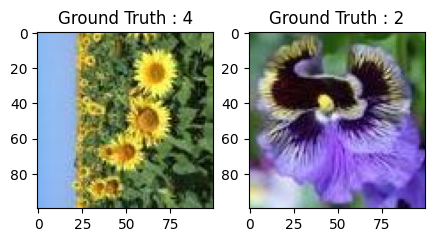

In [8]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

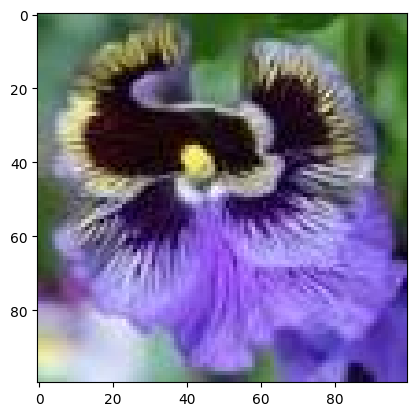

In [9]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [10]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 4
After conversion to one-hot: [0. 0. 0. 0. 1.]


# Creamos el Set de Entrenamiento y Validación

In [11]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [12]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(9788, 100, 100, 3) (2448, 100, 100, 3) (9788, 5) (2448, 5)


# Creamos el modelo de CNN

In [1]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 50 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [2]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(100,100,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))

sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

NameError: name 'Sequential' is not defined

In [15]:
sport_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 50, 50, 32)        0         
                                                                 
 flatten (Flatten)           (None, 80000)             0         
                                                                 
 dense (Dense)               (None, 32)                2560032   
                                                        

In [16]:
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [17]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20


153/153 [==============================] - 40s 201ms/step - loss: 1.3449 - accuracy: 0.4540 - val_loss: 1.0450 - val_accuracy: 0.7124
Epoch 2/20
153/153 [==============================] - 30s 197ms/step - loss: 0.9946 - accuracy: 0.6487 - val_loss: 0.7542 - val_accuracy: 0.8476
Epoch 3/20
153/153 [==============================] - 29s 192ms/step - loss: 0.8249 - accuracy: 0.7180 - val_loss: 0.6064 - val_accuracy: 0.8599
Epoch 4/20
153/153 [==============================] - 29s 192ms/step - loss: 0.7164 - accuracy: 0.7619 - val_loss: 0.5256 - val_accuracy: 0.8807
Epoch 5/20
153/153 [==============================] - 30s 197ms/step - loss: 0.6331 - accuracy: 0.7903 - val_loss: 0.4485 - val_accuracy: 0.8754
Epoch 6/20
153/153 [==============================] - 29s 192ms/step - loss: 0.5817 - accuracy: 0.8063 - val_loss: 0.4158 - val_accuracy: 0.8738
Epoch 7/20
153/153 [==============================] - 29s 191ms/step - loss: 0.5407 - accuracy: 0.8220 - val_loss: 0.3589 - val_

In [18]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("./floresMk3B.h5py")

INFO:tensorflow:Assets written to: ./floresMk3B.h5py\assets


INFO:tensorflow:Assets written to: ./floresMk3B.h5py\assets


# Evaluamos la red

In [19]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

96/96 [==============================] - 5s 15ms/step - loss: 0.1702 - accuracy: 0.9588


In [20]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.17018097639083862
Test accuracy: 0.9588235020637512


In [21]:
sport_train.history

{'loss': [1.3449310064315796,
  0.9945584535598755,
  0.8248634338378906,
  0.7164310812950134,
  0.633125364780426,
  0.5816777944564819,
  0.5406620502471924,
  0.4956003725528717,
  0.47752293944358826,
  0.43721041083335876,
  0.4197307229042053,
  0.3978690207004547,
  0.3795586824417114,
  0.35680797696113586,
  0.3476793169975281,
  0.3402390778064728,
  0.3265050947666168,
  0.31282666325569153,
  0.3015943765640259,
  0.29389068484306335],
 'accuracy': [0.4540253281593323,
  0.6486514210700989,
  0.7180220484733582,
  0.7618512511253357,
  0.7902534008026123,
  0.8062934279441833,
  0.8220269680023193,
  0.8382713794708252,
  0.8473641276359558,
  0.8608500361442566,
  0.8647323250770569,
  0.8756640553474426,
  0.8813853859901428,
  0.8895586729049683,
  0.8929300904273987,
  0.8971189260482788,
  0.901614248752594,
  0.9055987000465393,
  0.9126481413841248,
  0.9128524661064148],
 'val_loss': [1.045013427734375,
  0.7541681528091431,
  0.6063565611839294,
  0.52558428049087

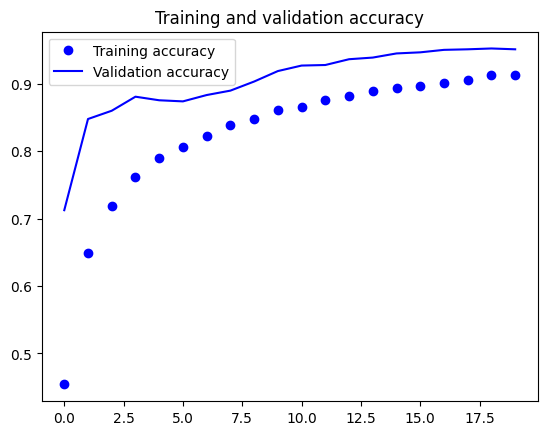

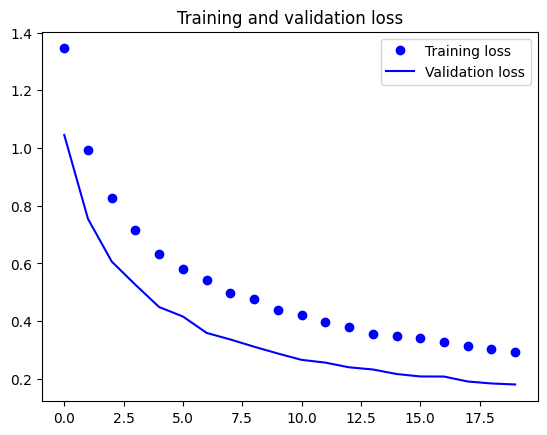

In [22]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [23]:
predicted_classes2 = sport_model.predict(test_X)

96/96 [==============================] - 8s 16ms/step


In [24]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [25]:
predicted_classes.shape, test_Y.shape

((3060,), (3060,))

# Aprendamos de los errores: Qué mejorar

Found 2934 correct labels


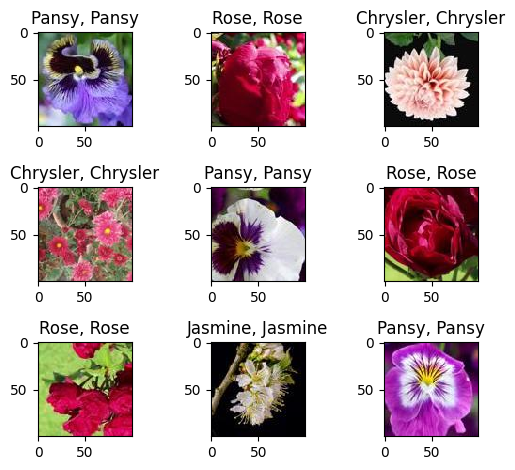

In [26]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(100,100,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

Found 126 incorrect labels


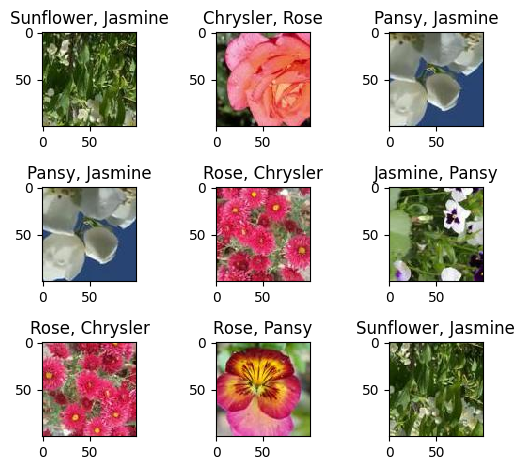

In [27]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(100,100,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [28]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.94      0.98      0.96       749
     Class 1       0.94      0.98      0.96       737
     Class 2       0.99      0.91      0.95       519
     Class 3       0.96      0.91      0.94       564
     Class 4       0.98      1.00      0.99       491

    accuracy                           0.96      3060
   macro avg       0.96      0.96      0.96      3060
weighted avg       0.96      0.96      0.96      3060

